In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime
#turns seconds into a string format ffmpeg uses
def seconds_formatter(sec):
    x = "0" + str(datetime.timedelta(seconds=sec))[:-3]
    return x

'00:02:55.305'

In [3]:
df = pd.read_hdf(r"C:\Users\vjj14\Desktop\DeepLabCut\goprolensfront-vj-2019-06-25\videos\Not_Injured_Straight_2.7k_120fps_Trim_284DeepCut_resnet50_goprolensfrontJun25shuffle1_60000.h5")
#remove extra level "scorer"
df.columns = df.columns.droplevel()
df.describe()

bodyparts      LeftEar                               RightEar               \
coords               x            y   likelihood            x            y   
count      7172.000000  7172.000000  7172.000000  7172.000000  7172.000000   
mean       1447.610699   324.825819     0.695893  1249.633308   347.611072   
std         275.999967   220.339389     0.374031   222.098638   220.044128   
min          -2.840416     0.655670     0.001389    -0.432687     2.516414   
25%        1411.663523   211.710243     0.328204  1173.337527   213.355287   
50%        1501.286919   265.948117     0.921644  1225.999567   300.430737   
75%        1563.750430   345.325982     0.973329  1339.909323   380.151613   
max        2704.912989   988.133272     0.997210  2356.795898   969.878196   

bodyparts                      Nose                              OtherHand  \
coords      likelihood            x            y   likelihood            x   
count      7172.000000  7172.000000  7172.000000  7172.000000  7172.000000   
mean          0.704018  1435.982365   632.775915     0.554368  1499.345172   
std           0.343025   255.233105   213.622666     0.409419   159.479855   
min           0.001993     1.106292     0.598420     0.002518   794.677431   
25%           0.452193  1342.532770   542.479073     0.073454  1438.794670   
50%           0.889158  1364.174641   670.976285     0.684272  1500.252394   
75%           0.963042  1497.383919   793.396533     0.971583  1556.644067   
max           0.999006  2698.840271  1404.923229     0.999141  2696.982943   

bodyparts     ...            Middle         Ring                            \
coords        ...        likelihood            x            y   likelihood   
count         ...       7172.000000  7172.000000  7172.000000  7172.000000   
mean          ...          0.225168  1314.228380   609.751499     0.203282   
std           ...          0.270437   197.576042   217.054450     0.255011   
min           ...          0.000815     1.937029     0.461762     0.000931   
25%           ...          0.031068  1204.095433   492.243961     0.030280   
50%           ...          0.079597  1339.465654   667.336055     0.074709   
75%           ...          0.360920  1369.136425   762.293292     0.284400   
max           ...          0.986650  2601.789390  1023.831366     0.992256   

bodyparts        Pinky                                 Pellet               \
coords               x            y   likelihood            x            y   
count      7172.000000  7172.000000  7172.000000  7172.000000  7172.000000   
mean       1294.526957   568.711787     0.226218  1374.035665   644.358714   
std         196.819925   217.287375     0.255207   167.832209   314.739297   
min           1.554063     0.838611     0.001811     1.319653     0.348341   
25%        1188.712610   387.718984     0.036124  1354.630916   301.557061   
50%        1301.841749   603.861638     0.094873  1371.236729   895.250200   
75%        1356.624405   703.508074     0.360657  1431.637924   911.136758   
max        2699.372733  1019.383763     0.978696  2688.311764  1022.317992   

bodyparts               
coords      likelihood  
count      7172.000000  
mean          0.293775  
std           0.296357  
min           0.001191  
25%           0.026675  
50%           0.100831  
75%           0.588597  
max           0.911185  

[8 rows x 30 columns]

In [4]:
def frame_to_time(frame):
    total_seconds = (frame/24320)*202
    return round(total_seconds, 3)
def time_to_frame(time):
    return 24320*(time/202)
def dist_from_dispenser(x, y):
    return ((x-396)**2 + (y-325)**2)**0.5
def outside_box(x, y):
    return y > 300

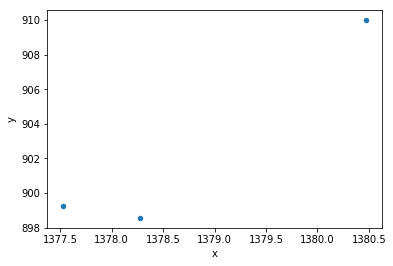

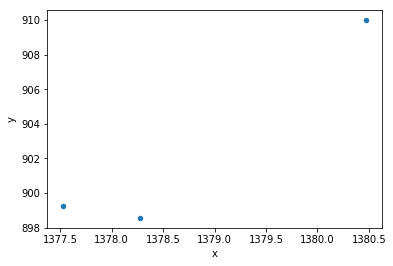

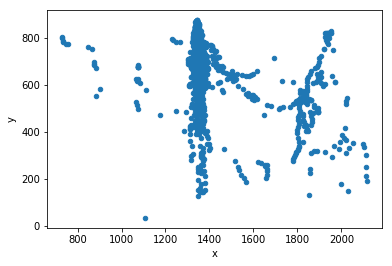

In [10]:
labels = {key: df[df[key, 'likelihood'] > 0.9][key] for key in list(df.columns.levels[0])}
{labels[key].insert(0, "frame", labels[key].index, True) for key in labels.keys()}
{labels[key].insert(0, "time", labels[key]['frame'].map(frame_to_time), True) for key in labels.keys()}
leftEar = labels['LeftEar']
rightEar = labels['RightEar']
nose = labels['Nose']
leftHand = labels['OtherHand']
rightHand = labels['DomHand']
index = labels['Index']
middle = labels['Middle']
ring = labels['Ring']
pinky = labels['Pinky']
pellet = labels['Pellet']
pellet.plot(kind='scatter', x='x', y='y')
pellet.plot(kind='scatter', x='x', y='y')
nose.plot(kind='scatter', x='x', y='y')

In [6]:
#add distance from dispenser column to the hand dataframe
rightHand['d_from_dispenser'] = rightHand.apply(lambda row: dist_from_dispenser(x = row['x'], y = row['y']), axis=1)
rightHand['outside_of_box'] = rightHand.apply(lambda row: outside_box(x = row['x'], y = row['y']), axis=1)
hand_reach = rightHand[rightHand['d_from_dispenser'] < 40]
# hand_reach = rightHand[rightHand['outside_of_box']]
hand_reach['time'].hist(bins=300)

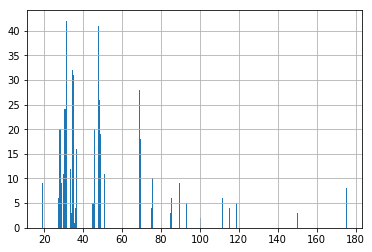

In [7]:
rightHand[rightHand['y'] > 315]['time'].hist(bins=300)

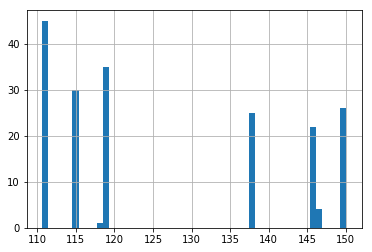

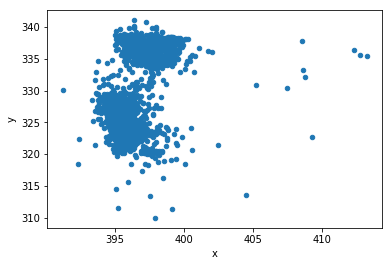

In [8]:
hand_reach = rightHand[(rightHand['d_from_dispenser'] < 40)& (rightHand['time'] < 155) & (rightHand['time'] > 109)]
hand_reach['time'].hist(bins=50)
pellet[(pellet['time'] < 155) & (pellet['time'] > 109)].plot(kind= 'scatter', x='x', y='y')

In [9]:
sum(hand_reach['y'] > 330)

0

## Determining when the mouse is reaching
### First Method: Basing it off of the distance from dispenser*
*where the pellet is SUPPPOSED to be, currently hard coded pixel coordinates.

In [10]:
hand_reach = rightHand[rightHand['d_from_dispenser'] < 15]
def get_reaches():
    """Returns: List of Tuples, where each tuple is a reach, 
    1st element of tuple is start time, 2nd element of tuple is the duration
    
    Given frames where hand is within a set radius, loop through, 
    bunch approximately consecutive frames (within x frames of each other)
    as a single reach. Filter out 'reaches' that are impossibly short.
    """
    reaches = []
    last_frame = hand_reach['frame'].values[0]
    consec_frames_ct = 1 #number of consecutive frames
    first_frame_of_reach = last_frame
    for frame in hand_reach['frame'].values:
        if (frame - last_frame < 10):
            print(frame-last_frame)
            consec_frames_ct += 1
        else:
            reaches.append((first_frame_of_reach, consec_frames_ct))
            consec_frames_ct = 1
            first_frame_of_reach = frame
        last_frame = frame
    reaches.append((first_frame_of_reach, consec_frames_ct))
    
    #filter out false positives: reaches that only lasted 2 or less frames
    reaches_filtered = [x for x in reaches if x[1] >= 2]
    reaches_with_time = [(frame_to_time(x[0]), frame_to_time(x[1])) for x in reaches_filtered]
    return reaches_with_time
len(get_reaches())

0
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
8
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
9
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
4
1
1
1
1
1
1
1


34

## Second Method: When the hand crosses the line, or outside of the acrylic
Hard coded line

In [11]:
hand_reach = rightHand[rightHand['outside_of_box']]
def get_reaches():
    """Returns: List of Tuples, where each tuple is a reach, 
    1st element of tuple is start time, 2nd element of tuple is the duration
    
    Given frames where hand is within a set radius, loop through, 
    bunch approximately consecutive frames (within x frames of each other)
    as a single reach. Filter out 'reaches' that are impossibly short.
    """
    reaches = []
    last_frame = hand_reach['frame'].values[0]
    consec_frames_ct = 1 #number of consecutive frames
    first_frame_of_reach = last_frame
    for frame in hand_reach['frame'].values:
        if (frame - last_frame < 10):
            consec_frames_ct += 1
        else:
            reaches.append((first_frame_of_reach, consec_frames_ct))
            consec_frames_ct = 1
            first_frame_of_reach = frame
        last_frame = frame
    reaches.append((first_frame_of_reach, consec_frames_ct))
    
    #filter out false positives: reaches that only lasted 2 or less frames
    reaches_filtered = [x for x in reaches if x[1] >= 2]
    reaches_with_time = [(frame_to_time(x[0]), frame_to_time(x[1])) for x in reaches_filtered]
    return reaches_with_time
len(get_reaches())

37

## Create Compilation of Hand Reaches
Creates a windows batch file

In [12]:
#Open up new batch file
project_name = "goprofrontview"
bat_file= r"C:\Users\vjj14\Desktop\DeepLabCut\goprofrontview-vj-2019-06-17\videos\{}_create_videos.bat".format(project_name)
script_writer= open(bat_file,"w")

#write series of shell commands to create videos for each attempt, connected by '&&' for the batch file
reaches = get_reaches()
vids = []
for tpl in reaches:
    start_time = seconds_formatter(max(0, tpl[0] - 2.0))
    cmd = "ffmpeg -i gp.mp4 -ss {0} -t {1} -c copy {2}.mp4".format(start_time, 2.5 + tpl[1], np.round(tpl[0], 3))
    vids.append(str(np.round(tpl[0], 3)) + ".mp4")
    script_writer.write(cmd + " && ")
script_writer.close()

#open and write a list of videos to concatenate (.txt file) for ffmpeg to use
list_file = r"C:\Users\vjj14\Desktop\DeepLabCut\goprofrontview-vj-2019-06-17\videos\{}_video_list.txt".format(project_name)
list_writer = open(list_file, "w+")
for v in vids:
    list_writer.write('file ' + "\'" + r"C:\Users\vjj14\Desktop\DeepLabCut\goprofrontview-vj-2019-06-17\videos\{}".format(v) + "\'\n")
list_writer.close()

#open batch file again and write command to produce a concatenated video, the final product
script_writer = open(bat_file, "a+")
script_writer.write("ffmpeg -f concat -safe 0 -i {0} -c copy output.mp4".format(list_file))
script_writer.close()

## Determining when the pellet is there
### First Method: Based off of distance from dispenser*
*Where the pellet is SUPPOSED to be.

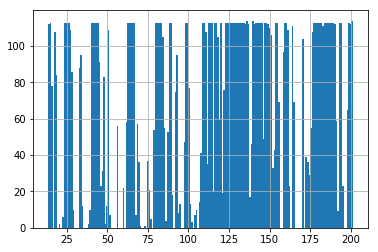

In [13]:
#add distance from dispenser column to the hand dataframe
pellet['d_from_dispenser'] = pellet.apply(lambda row: dist_from_dispenser(x = row['x'], y = row['y']), axis=1)
pellet2 = pellet[pellet['d_from_dispenser'] < 20]
pellet2['time'].hist(bins=200)

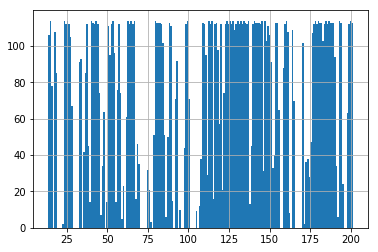

In [14]:
pellet[pellet['likelihood']>0.99]['time'].hist(bins=200)

### Second Method: Using (averaged) likelihood
Based off the observation that pellets in position have much higher likelihoods. I think that this is a bad idea and may not generalize, but the way I did it (averaging frames around it) is an alternate and possibly better way to deal with outliers.

1631


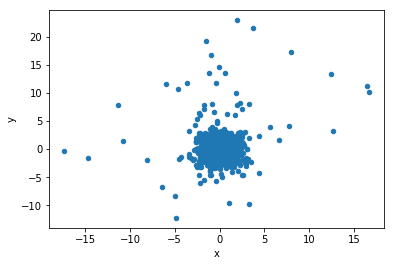

In [15]:
c99 = pellet[pellet['likelihood'] > 0.99]
subset = c99.diff().reset_index()
# subset[(subset['y'] < 1) & (subset['y'] > -1)].plot(kind='scatter', x='index', y='y')
# subset.diff()
# subset['index'].hist(bins=500)
print(min(subset['index']))
max(subset['index'])
subset.plot(kind = 'scatter', x='x', y='y')

In [22]:
array = np.zeros(25000)
for frame in c99['frame']:
    array[frame] = 1.0
temp = array.copy()
for i in range(25, len(array)):
    temp[i] = np.mean(array[i-25:i+25])
#     print(np.mean(array[i-50:i+50]))
array = temp
# np.histogram(array, bins=200, range=(0, 25000))
def experiment():
    results = []
    temp = array > 0.5
    curr_start = 0
    curr_len = 0
    for i in range(len(temp)):
        if temp[i] and curr_len == 0:
            curr_start = i
            curr_len = 1
        elif temp[i]:
            curr_len += 1
        elif not temp[i] and curr_len != 0:
            results.append((curr_start, curr_len))
            curr_len = 0
    
    #filter out false positives: 'reaches' that lasted for less than 0.1 seconds
    results2 = [x for x in results if x[1] > 12] #assuming 120 fps
    results2_time = [(frame_to_time(x[0]), frame_to_time(x[1])) for x in results2]
    return results2_time
print(len(experiment()))
pellet_times = experiment()

33


In [17]:
np.argwhere(array > 0.5)
pellet2 = pellet[pellet['likelihood'] > 0.99]
def get_pellet_times():
    pellet2 = pellet[(pellet['d_from_dispenser'] < 12)]
    pellets = []
    last_frame = pellet2['frame'].values[0]
    consec_frames_ct = 1 #number of consecutive frames
    first_frame_of_pellet = last_frame
    for frame in pellet2['frame'].values:
        if (frame - last_frame < 18):
            consec_frames_ct += 1
        else:
            pellets.append((first_frame_of_pellet, consec_frames_ct))
            consec_frames_ct = 1
            first_frame_of_pellet = frame
        last_frame = frame
    pellets.append((first_frame_of_pellet, consec_frames_ct))
    
    #filter out false positives: 'reaches' that lasted for less than 0.1 seconds
    pellet2 = [x for x in pellets if x[1] > 12] #assuming 120 fps
    pellets2_time = [(frame_to_time(x[0]), frame_to_time(x[1])) for x in pellet2]
    return pellets2_time
pellet_times = get_pellet_times()

In [19]:
def binary_search(p_times, r_time):
    if len(p_times) == 1:
        if (r_time[0] < p_times[0][0]) or (r_time[0] > p_times[0][0] + p_times[0][1]):
            return "No Pellet There " + str(p_times[0])
        return p_times[0]
    elif r_time[0] > p_times[len(p_times)//2][0]:
        return binary_search(p_times[len(p_times)//2:], r_time)
    else:
        return binary_search(p_times[:len(p_times)//2], r_time)

In [21]:
for r in reaches:
    print(r)
    print(binary_search(pellet_times, r))

(18.904, 0.208)
(17.484, 1.487)
(19.212, 0.299)
No Pellet There (17.484, 1.487)
(26.778, 0.033)
(22.949, 5.465)
(27.401, 0.183)
(22.949, 5.465)
(28.157, 0.266)
(22.949, 5.465)
(28.722, 0.324)
No Pellet There (22.949, 5.465)
(30.333, 0.291)
No Pellet There (22.949, 5.465)
(30.981, 0.473)
No Pellet There (22.949, 5.465)
(32.127, 0.025)
No Pellet There (22.949, 5.465)
(33.406, 0.266)
No Pellet There (32.651, 0.723)
(34.088, 0.266)
No Pellet There (32.651, 0.723)
(34.827, 0.988)
No Pellet There (32.651, 0.723)
(36.098, 0.224)
No Pellet There (32.651, 0.723)
(44.935, 0.241)
(39.835, 5.224)
(45.658, 0.166)
No Pellet There (39.835, 5.224)
(47.701, 0.341)
(47.169, 0.864)
(48.457, 0.374)
No Pellet There (47.169, 0.864)
(51.023, 0.249)
No Pellet There (47.169, 0.864)
(51.92, 0.033)
No Pellet There (47.169, 0.864)
(68.499, 0.266)
No Pellet There (61.962, 4.909)
(69.138, 0.216)
(68.516, 0.689)
(75.102, 0.116)
No Pellet There (68.516, 0.689)
(75.592, 0.174)
No Pellet There (75.144, 0.44)
(84.538, 0

## Trying to identify pellet position automatically

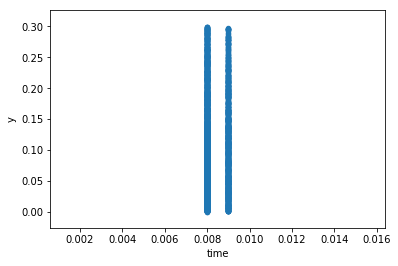

In [32]:
x = pellet.diff()
x = x[(x['x'] < 0.16) & (x['x'] > -0.16)]
x = x[(x['y'] > 0) & (x['y'] < 0.3)]
x.plot(kind='scatter', x = 'time', y='y')